In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
from google.colab import drive
# create a shortcut of the dataset to the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read perfumes data
perfumes = pd.read_csv("/content/drive/My Drive/final_perfume_data.csv", encoding='latin-1')

In [4]:
perfumes.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [5]:
# create a new column for the main scent
perfumes['Scent'] = perfumes['Notes'].str.split(',').str[0]

In [6]:
perfumes.head()

,Name,Brand,Description,Notes,Image URL,Scent
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...,Vanilla bean
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...,Lavender
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...,Green yuzu
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...,tangerine
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...,Bergamot


In [7]:
# decapitalize names of scents
perfumes['Scent'] = perfumes['Scent'].str.lower()

In [8]:
perfumes.shape

(2191, 6)

In [9]:
# create a new dataframe for scent counts before cleaning data
before = perfumes['Scent'].value_counts().reset_index()
before.columns = ['Scent', 'Count']
before.tail()

,Scent,Count
718,atlas cedarwood,1
719,absinthe (artemisia absinthum),1
720,texas cedarwood fraction orpur,1
721,palm tree leaves,1
722,exotic woods,1


In [10]:
# size of dataframe
before.shape

(723, 2)

Text(0.5, 1.0, '(Before Cleaning Data) Scent Count')

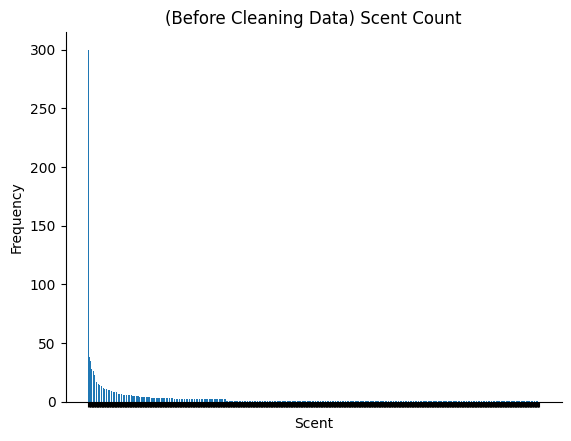

In [11]:
# create a chart to visualize all scents before cleaning data
from matplotlib import pyplot as plt
before.columns = ['Scent', 'Count']
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.bar(before['Scent'], before['Count'], width=0.7)
plt.ylabel("Frequency")
plt.gca().set_xticklabels([])
plt.xlabel("Scent")
plt.title("(Before Cleaning Data) Scent Count")

In [12]:
# count the number of scents and its occurence
counts = perfumes['Scent'].value_counts()

In [13]:
# disgard all perfumes with scents that is uncommon (for simplicity purpose)
filtered_perfumes = perfumes[perfumes['Scent'].isin(counts[counts > 10].index)]
filtered_perfumes = filtered_perfumes.reset_index(drop=True)

In [14]:
# create a new dataframe for all scent counts after cleaning data
after = filtered_perfumes['Scent'].value_counts().reset_index()
after.columns = ['Scent', 'Count']
after.tail()

,Scent,Count
26,tuberose,11
27,mint,11
28,patchouli,11
29,tobacco,11
30,leather,11


In [15]:
after.shape

(31, 2)

Text(0.5, 1.0, '(After Cleaning Data) Scent Count')

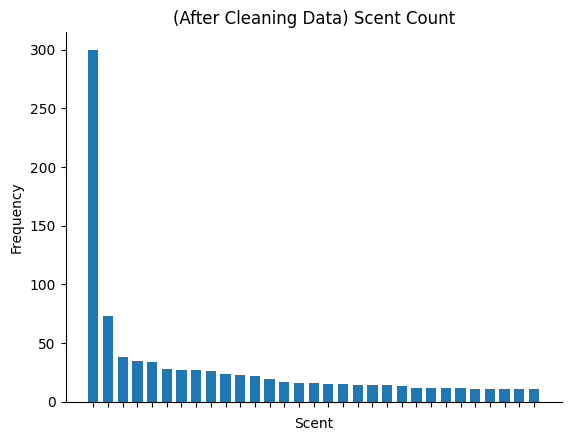

In [17]:
# create a chart to visualize all scents before cleaning data
from matplotlib import pyplot as plt
after.columns = ['Scent', 'Count']
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.bar(after['Scent'], after['Count'], width=0.7)
plt.ylabel("Frequency")
plt.gca().set_xticklabels([])
plt.xlabel("Scent")
plt.title("(After Cleaning Data) Scent Count")

In [18]:
# a dataframe of filtered perfumes
filtered_perfumes.head()

,Name,Brand,Description,Notes,Image URL,Scent
0,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...,lavender
1,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...,bergamot
2,Eshu Extrait,PRIN,"Eshu, the mischievous god of Yoruba legend, w...","Tobacco, hay, elemi, copaiba, olibanum, nutme...",https://static.luckyscent.com/images/products/...,tobacco
3,Saringkarn Extrait,PRIN,A taste of love and seduction. The value of l...,"Saffron, champaca, fir balsam, beeswax, amber...",https://static.luckyscent.com/images/products/...,saffron
4,L'Homme A La Rose Eau de Parfum,Maison Francis Kurkdjian,Francis Kurkdjian has a talent for making mas...,"Grapefruit, Damascene rose, amber woods accor...",https://static.luckyscent.com/images/products/...,grapefruit


In [19]:
# count the frequencies of all scents
pd.set_option('display.max_rows', None)
filtered_perfumes['Scent'].value_counts()

 bergamot          300
 lemon              73
 pink pepper        38
 saffron            35
 grapefruit         34
 cardamom           28
 mandarin           27
 orange             27
 rose               26
 neroli             24
 lavender           23
 jasmine            22
 citrus             19
 incense            17
 amber              16
 black pepper       16
 vanilla            15
 ginger             15
 yuzu               14
 aldehydes          14
 lime               14
 musk               13
 oud                12
 petitgrain         12
 orange blossom     12
 sandalwood         12
 tuberose           11
 mint               11
 patchouli          11
 tobacco            11
 leather            11
Name: Scent, dtype: int64

In [20]:
# saving the dataframe to my device
filtered_perfumes.to_csv('/content/drive/My Drive/final_list.csv', index=False)

In [39]:
# select only perfumes with specific scents
filtered_perfumes2 = filtered_perfumes[(filtered_perfumes['Scent'].str.strip() == 'rose') | (filtered_perfumes['Scent'].str.strip() == 'yuzu') | (filtered_perfumes['Scent'].str.strip() == 'sandalwood')]
filtered_perfumes2.shape # number of perfumes with a rose, yuzu, or sandalwood scent

(52, 6)

In [28]:
# randomly return a perfume everytime I run the system
filtered_perfumes2.sample()

,Name,Brand,Description,Notes,Image URL,Scent
752,La Fille de Berlin Eau de Parfum,Serge Lutens,The Girl from Berlin is Serge Lutens's thir...,"Rose, violet, pink and black pepper, musk",https://static.luckyscent.com/images/products/...,rose
